In [1]:
import numpy as np

In [2]:
def createData():
    group=np.array([[1.,.9],[1.,1.],[.1,.2],[.0,.1]])
    labels=['A','A','B','B']
    return group,labels

In [3]:
group,labels=createData()
group

array([[ 1. ,  0.9],
       [ 1. ,  1. ],
       [ 0.1,  0.2],
       [ 0. ,  0.1]])

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
group[:,0] #np.array可以这么取元素，list不可以

array([ 1. ,  1. ,  0.1,  0. ])

In [6]:
group[:,1] 

array([ 0.9,  1. ,  0.2,  0.1])

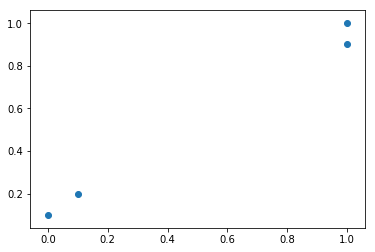

In [7]:
plt.scatter(group[:,0],group[:,1])

In [8]:
np.tile([1,2,3],3)

array([1, 2, 3, 1, 2, 3, 1, 2, 3])

In [9]:
np.tile([1,2,3],(3,1))

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [10]:
diff=np.array([1,2,3])-np.array([1,1,1])
diff

array([0, 1, 2])

In [11]:
diff=np.array([[1,2,3],[2,3,4]])-np.array([[1,1,1],[1,1,1]])
diff

array([[0, 1, 2],
       [1, 2, 3]])

In [12]:
diff

array([[0, 1, 2],
       [1, 2, 3]])

In [13]:
diff**2

array([[0, 1, 4],
       [1, 4, 9]])

In [38]:
sum(diff**2) # python自带的sum求得是同一列的数的和

array([ 1,  5, 13])

In [15]:
np.sum(diff**2,axis=1) # np.sum

array([ 5, 14])

In [16]:
len(group)

4

In [17]:
# 使用np.argsort，排序返回的是从小到大排序后的索引
def knnclassify(newinput,datas,lables,k):
    #distances=[]
    #input_x,input_y=newinput
    #for x,y in datas: 这样只能计算二维的
        #distances.append((x-input_x)**2+(y-input_y)**2)
    diff=np.tile(newinput,(len(datas),1))-datas
    distances=np.sum(diff**2,axis=1)
    sort_distances=np.argsort(distances)
    print distances
    print sort_distances
    
    classCount={}
    for i in range(k):
        votelabel=lables[sort_distances[i]]
        classCount[votelabel]=classCount.get(votelabel,0)+1
    print classCount
    
    maxCount=0
    for key,value in classCount.items():
        if value>maxCount:
            maxCount=value
            maxIndex=key
    #print maxIndex
    return maxIndex

In [18]:
group

array([[ 1. ,  0.9],
       [ 1. ,  1. ],
       [ 0.1,  0.2],
       [ 0. ,  0.1]])

In [19]:
knnclassify([0,0],group,labels,2)

[ 1.81  2.    0.05  0.01]
[3 2 0 1]
{'B': 2}


'B'

In [20]:
knnclassify([.1,.3],group,labels,3)

[ 1.17  1.3   0.01  0.05]
[2 3 0 1]
{'A': 1, 'B': 2}


'B'

In [21]:
knnclassify([1.2,1.],group,labels,3)

[ 0.05  0.04  1.85  2.25]
[1 0 2 3]
{'A': 2, 'B': 1}


'A'

- 准备数据，原数据太大，这里切前3000行进行测试。

In [22]:
import pandas as pd
datas=pd.read_csv('train.csv')
datas.shape

(42000, 785)

In [23]:
digitdatas=datas[:3000]
digitdatas.shape

(3000, 785)

In [24]:
digitdatas.to_csv('digit_datas.csv',index=False)

In [25]:
all_datas=pd.read_csv('digit_datas.csv')
print all_datas.shape
all_datas.head()

(3000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
y=all_datas['label'].values
x=all_datas.drop(['label'],axis=1).values
print y[:10]
x[:10]

[1 0 1 4 0 0 7 3 5 3]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
set(x[0])

{0,
 7,
 10,
 13,
 15,
 16,
 17,
 20,
 22,
 23,
 25,
 27,
 29,
 54,
 76,
 77,
 80,
 81,
 88,
 89,
 93,
 94,
 95,
 103,
 123,
 131,
 159,
 167,
 168,
 170,
 188,
 191,
 195,
 196,
 198,
 203,
 206,
 207,
 208,
 209,
 210,
 214,
 218,
 220,
 235,
 238,
 240,
 245,
 247,
 248,
 250,
 251,
 253,
 254,
 255}

In [28]:
# 大于1的像素都转为1
x[x>0]=1

In [29]:
set(x[0])

{0, 1}

In [30]:
from sklearn.cross_validation import train_test_split

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train.shape,len(y_train),x_test.shape,len(y_test)

((2100, 784), 2100, (900, 784), 900)

In [32]:
x_train[:1]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 

In [33]:
y_train[:1]

array([0])

In [34]:
y_train[1750]

9

In [35]:
# 使用np.argsort，排序返回的是从小到大排序后的索引
def knnClassify(newinput,datas,lables,k):
    #distances=[]
    #input_x,input_y=newinput
    #for x,y in datas: 这样只能计算二维的
        #distances.append((x-input_x)**2+(y-input_y)**2)
    diff=np.tile(newinput,(len(datas),1))-datas
    distances=np.sum(diff**2,axis=1)
    sort_distances=np.argsort(distances)
    #print distances
    #print sort_distances
    
    classCount={}
    for i in range(k):
        #print i,sort_distances[i]
        #print lables[sort_distances[i]]
        votelabel=lables[sort_distances[i]]
        classCount[votelabel]=classCount.get(votelabel,0)+1
    #print classCount
    
    maxCount=0
    for key,value in classCount.items():
        if value>maxCount:
            maxCount=value
            maxIndex=key
    #print maxIndex
    return maxIndex

In [36]:
matchCount=0
for i in range(len(x_test)):
    predict=knnClassify(x_test[i],x_train,y_train,3)
    #print predict,y_test[i]
    if predict==y_test[i]:
        matchCount+=1
    else:
        print predict,y_test[i]
    accuracy=float(matchCount)/len(x_test)
print accuracy

5 6
7 8
0 9
0 8
9 5
9 2
5 9
9 5
0 9
9 4
6 4
8 3
3 5
9 4
9 7
9 4
5 3
5 3
9 8
8 3
1 2
7 9
0 6
1 2
9 4
8 5
8 2
6 8
9 5
1 8
6 5
1 3
5 8
3 5
8 5
8 7
1 8
9 5
1 2
9 7
8 3
9 7
3 8
1 3
1 8
7 8
3 8
9 4
7 2
7 9
1 2
9 4
9 8
3 8
1 8
9 7
9 3
1 7
5 8
8 5
7 8
4 9
8 5
9 4
0.928888888889
